# [Workshop] Abductive Reasoning using Bayes Method

# 0. Installation

In [1]:
# !pip install scikit-learn==0.23.1 

# 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# 2. Check Data

In [3]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('../data/Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [4]:
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat_10_Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class_ASD_Traits_  
0                No  
1     

In [5]:
# observing the shape of the data
print(ASD_data.shape)

(1054, 19)


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [6]:
Sex = pd.Categorical(pd.Categorical(ASD_data['Sex']).codes)
Ethnicity = pd.Categorical(pd.Categorical(ASD_data['Ethnicity']).codes)
Jaundice = pd.Categorical(pd.Categorical(ASD_data['Jaundice']).codes)
Family_mem_with_ASD = pd.Categorical(pd.Categorical(ASD_data['Family_mem_with_ASD']).codes)
Class_ASD_Traits_ = pd.Categorical(pd.Categorical(ASD_data['Class_ASD_Traits_']).codes)

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_

# Check the data and think why we drop these variables?
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_', 'Age_Mons'], axis=1)
# X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Class_ASD_Traits_'], axis=1)
X


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,0,5,0,1
1050,0,0,1,1,1,0,1,0,1,0,1,7,1,0
1051,1,0,1,1,1,1,1,1,1,1,1,8,1,0
1052,1,0,0,0,0,0,0,1,0,1,1,5,0,1


## 3.2 Choose target

In [7]:
# Y_classification = ASD_data.Outcome
Y_classification = ASD_data.Class_ASD_Traits_

# 4. Build Naive Bayes Model

## 4.1 Split the dataset into training set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 5, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(843, 14)
(211, 14)


## 4.2. Build Naive Bayes Model

In [9]:
NaiveBayesModel = MultinomialNB()
NaiveBayesModel.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(NaiveBayesModel.score(X_train, y_train)))
print('Score in test set: {:3f}'.format(NaiveBayesModel.score(X_test,y_test)))


Score in training set: 0.924
Score in test set: 0.928910


# 5. Visualize the Outcome

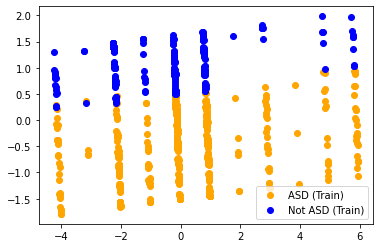

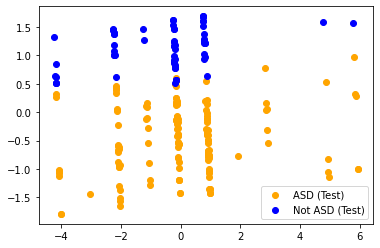

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(np.concatenate((X_train,X_test)))

# Train set
plt.scatter(X_new[:843, 0][y_train==1], X_new[:843, 1][y_train==1], marker='o', c='orange') # Orange: ASD_in_train; 
plt.scatter(X_new[:843, 0][y_train==0], X_new[:843, 1][y_train==0], marker='o', c='b') # Blue Not ASD_in_train;
plt.legend(['ASD (Train)', 'Not ASD (Train)'])
plt.show()

# Test set
plt.scatter(X_new[843:, 0][y_test==1], X_new[843:, 1][y_test==1], marker='o', c='orange') # Orange: ASD_in_test; 
plt.scatter(X_new[843:, 0][y_test==0], X_new[843:, 1][y_test==0], marker='o', c='b') # Blue Not ASD_in_test;
plt.legend(['ASD (Test)', 'Not ASD (Test)'])
plt.show()

### Confusion matrix: TP; TN; FP; FN

https://en.wikipedia.org/wiki/Confusion_matrix


| Confusion Matrix  |   |  |  |
| :-: | :-: | :-: | :-: |
|  |  | Actual Class | Actual Class |
|  |  | **Positive** | **Negative** |
| Predicted Class | **Positive** | TP: True Positive | FP: False Positive |
| Predicted Class | **Negative** | FN: False Negative | TN: True Negative |


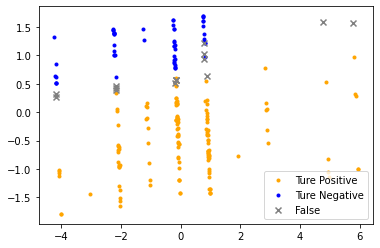

In [11]:

ASD_ASD = pd.Series(dtype = 'int')  # Ture Positive: y_test is ASD and recognized as ASD (Correct)
NOT_ASD_NOT_ASD = pd.Series(dtype = 'int') # Ture Negative: y_test is NOT ASD and recognized as NOT ASD (Correct)
wrong_answer = pd.Series(dtype = 'int') # False: y_test is ASD and recognized as NOT ASD  or y_test is NOT ASD and recognized as ASD (Wrong)

y_predict = NaiveBayesModel.predict(X_test)
for y_gt, y_pd in zip(list(y_test), y_predict):
    if y_gt == 1 and y_pd == 1:
        ASD_ASD=ASD_ASD.append(pd.Series(1))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(0))
        wrong_answer=wrong_answer.append(pd.Series(0))
    elif y_gt == 0 and y_pd == 0:
        ASD_ASD=ASD_ASD.append(pd.Series(0))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(1))
        wrong_answer=wrong_answer.append(pd.Series(0))
    else:
        ASD_ASD=ASD_ASD.append(pd.Series(0))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(0))
        wrong_answer=wrong_answer.append(pd.Series(1))
plt.scatter(X_new[843:, 0][ASD_ASD==1], X_new[843:, 1][ASD_ASD==1], 
            marker='.', c='orange') # Ture Positive: y_test is ASD and recognized as ASD (Correct)

plt.scatter(X_new[843:, 0][NOT_ASD_NOT_ASD==1], X_new[843:, 1][NOT_ASD_NOT_ASD==1], 
            marker='.', c='blue') # Ture Negative: y_test is NOT ASD and recognized as NOT ASD (Correct)

plt.scatter(X_new[843:, 0][wrong_answer==1], X_new[843:, 1][wrong_answer==1], 
            marker='x', c='grey') # False: y_test is ASD and recognized as NOT ASD  or y_test is NOT ASD and recognized as ASD (Wrong)


plt.legend(['Ture Positive', 'Ture Negative', 'False'],loc='lower right')
plt.show()

### Quiz: What you observe from the above figure? Where do wrong predicitons mostly like to occur?

In [12]:
# Your answer and reasoning:
#
#
#